In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
file_name = '/content/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

In [ ]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [ ]:
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [ ]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace = True)

In [ ]:
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace = True)

<Axes: xlabel='bedrooms', ylabel='price'>

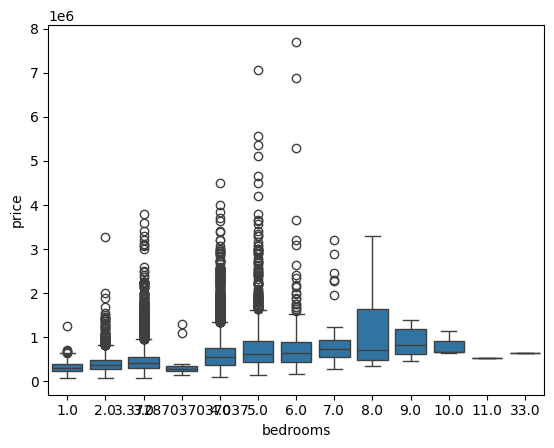

In [ ]:
sns.boxplot(x='bedrooms', y='price', data=df)

<Axes: xlabel='sqft_above', ylabel='price'>

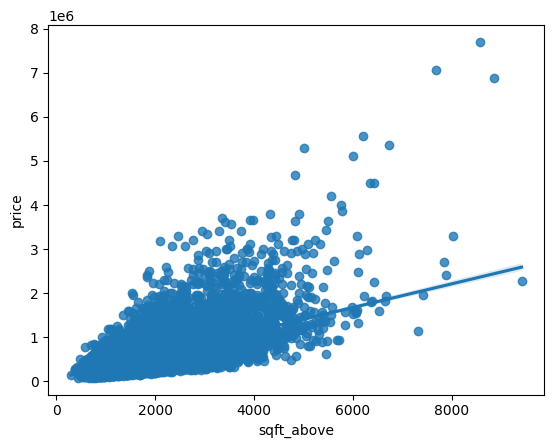

In [ ]:
sns.regplot(x=df["sqft_above"], y=df["price"], data=df)

In [ ]:
df.drop(columns=['date'], inplace=True)
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
Y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
print("ukuran data training dan data testing : ")
print("ukuran data training dan data testing : ", X_train.shape, y_train.shape)
print("ukuran data training dan data testing : ", X_test.shape, y_test.shape)

ukuran data training dan data testing : 
ukuran data training dan data testing :  (17290, 11) (17290,)
ukuran data training dan data testing :  (4323, 11) (4323,)


In [ ]:
LinearReg = LinearRegression().fit(X_train, y_train)

In [ ]:
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

In [ ]:
print('Nilai MSE data training Regresi Linear = ' , mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data tresting Regresi Linear = ' , mean_squared_error(y_test, ypredtest_reglin))

Nilai MSE data training Regresi Linear =  42475737566.43205
Nilai MSE data tresting Regresi Linear =  61114257212.2927


In [ ]:
print(f'R^2 score Regresi Linear: ', {LinearReg.score(X, Y)})

R^2 score Regresi Linear:  {0.6571812660401274}


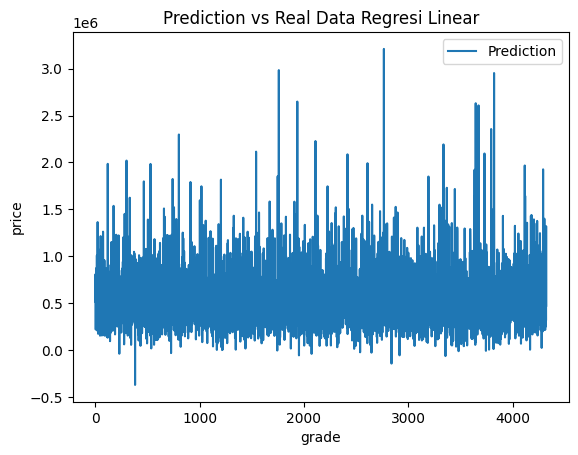

In [ ]:
plt.plot(ypredtest_reglin)
plt.title('Prediction vs Real Data Regresi Linear')
plt.xlabel("grade")
plt.ylabel("price")
plt.legend(labels=[ 'Prediction', "Real"])
plt.show()

In [ ]:
y_pred = LinearReg.predict(X_test)

In [ ]:
LinearReg.score(X_test, y_test)

0.6459217069635976

In [ ]:
LinearReg.predict([[1.0,0, 47.5112,3.0,0,0,1.00,1340,1180,7,1180]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([289244.68735434])